In [ ]:
local = False
if local:
  datasetfolder='../datasets/'
else :
  datasetfolder='/content/datasets/'
  #vervang dit naar het pad in Google Drive waar jouw project staat
  projectFolder='/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/9 clustering/'
  from google.colab import drive
  !rm /content/datasets
  drive.mount('/content/drive')
  #vervang dit naar het pad in Google Drive waar jouw datasets staat
  !ln -s '/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/9 clustering/oefeningen/datasets' "/content/datasets"
  !ls /content/datasets
  drive.mount('/content/drive')
  import sys
  import os
  sys.path.append(os.path.abspath(projectFolder))
print('de folder met datasets = ' + datasetfolder)


# Studenten

In [ ]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import six

sys.modules['sklearn.externals.six'] = six
from IPython.display import display
from scipy.spatial.distance import cdist
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


1. Lees het bestand "studentenScores.csv" in. Hierin staan de scores van 100 studenten op bepaalde vakken


In [ ]:
studenten = pd.read_csv("datasets/studentenScores.csv")
print(studenten.head())
len(studenten)

   vak1  vak2  vak3  vak4  vak5  vak6  vak7  vak8  vak9      score
0    13     9    17     2    17     1     0    14    18  gemiddeld
1    10    13     5    20    20    14     4     2    10       goed
2    13     4     2    19     3     9    16    13     7       goed
3     8     3    17     7    16    10    15     9     8     slecht
4     1    12    13     2     9    10     2     2    13     slecht


100

2. In de file staan de punten van 100 studenten voor 9 vakken en een beoordeling in het algemeen door de docenten op basis van deze punten en hun werkattitude. Bereken de afstand tussen de eerste student (student0) en de tweede student (student1) voor deze 9 vakken op de volgende manieren:
    *  euclidisch
    *  gestandaardiseerd euclidisch
    *  manhattan



In [ ]:
studentpunten = studenten.drop(['score'], axis=1)  #we droppen de targetkolom
print(studentpunten.head())
print(" ")
print("De afstanden tussen de student 0 en student 1 zijn: ")
print(" ")
for metric, metricname in zip(['euclidean', 'seuclidean', 'cityblock'],
                              ['Euclidische', 'Gestandaardiseerd euclidisch', 'Manhattan']):
    print(f"      {metricname}: {cdist(studentpunten, studentpunten, metric=metric)[0, 1]}")

   vak1  vak2  vak3  vak4  vak5  vak6  vak7  vak8  vak9
0    13     9    17     2    17     1     0    14    18
1    10    13     5    20    20    14     4     2    10
2    13     4     2    19     3     9    16    13     7
3     8     3    17     7    16    10    15     9     8
4     1    12    13     2     9    10     2     2    13
 
De afstanden tussen de student 0 en student 1 zijn: 
 
      Euclidische: 29.916550603303182
      Gestandaardiseerd euclidisch: 5.077324739746527
      Manhattan: 77.0


3. We zoeken 4 clusters in deze set. Kies volgende centroids:
    *  (9, 3, 14, 1, 6, 10, 10, 15,11)
    *  (12, 18, 9, 5, 18, 1, 3, 18,12)
    *  (6, 15, 13, 18, 9, 15, 20, 18,13)
    *  (5, 4, 7, 18, 20, 17, 1, 15,14)



> Bereken nu de euclidische afstand van student met rangnummer 1 (dit is dan de tweede student eigenlijk want we beginnen te tellen bij 0) , 10, 20 en 30 tot deze centroids.
TIP: Maak eerst een dataframe van de centroids en dan een dataframe van de 4 studenten.





In [ ]:
centroids = pd.DataFrame([
    list((9, 3, 14, 1, 6, 10, 10, 15, 11)),
    list((12, 18, 9, 5, 18, 1, 3, 18, 12)),
    list((6, 15, 13, 18, 9, 15, 20, 18, 13)),
    list((5, 4, 7, 18, 20, 17, 1, 15, 14))], columns=studentpunten.columns,
    index=['centroid1', 'centroid2', 'centroid3', 'centroid4'])
print(centroids)

selectiestudent = studentpunten.iloc[[1, 10, 20, 30], :].copy()
print(selectiestudent)

afstand_eu = pd.DataFrame(data=cdist(selectiestudent, centroids), columns=centroids.index.values,
                          index=selectiestudent.index.values)
display(afstand_eu)

           vak1  vak2  vak3  vak4  vak5  vak6  vak7  vak8  vak9
centroid1     9     3    14     1     6    10    10    15    11
centroid2    12    18     9     5    18     1     3    18    12
centroid3     6    15    13    18     9    15    20    18    13
centroid4     5     4     7    18    20    17     1    15    14
    vak1  vak2  vak3  vak4  vak5  vak6  vak7  vak8  vak9
1     10    13     5    20    20    14     4     2    10
10     9    11    13     6    17    10     7    20    16
20    19     3     4     2     5    15    15     4    11
30    16    16     9     7    14    19     9    12    18


,centroid1,centroid2,centroid3,centroid4
1,31.000000,26.532998,27.037012,17.804494
10,16.431677,13.892444,20.976177,19.183326
20,19.313208,31.843367,29.849623,31.890437
30,21.977261,21.725561,21.470911,22.781571



4. Bij welke centroid zou je deze studenten indelen?

In [ ]:
#student 1 bij centroid4 (kleinste afstand is 17,804), student10 bij centroid2,student20 bij centroid1, student30 bij centroid 3  
#met code indien je grote datasets moet behandelen
afstand_eu.apply(np.argmin, axis=1) + 1  #argmin zoekt index die minimum waarde geeft per rij, we zoeken kolomnr maar moeten 1 optellen omdat we bij nul beginnen

1     4
10    2
20    1
30    3
dtype: int64

5. Bepaal de categorieën (clusters) van iedere student a.d.h.v. het K-means algoritme. Hoeveel studenten zitten er in iedere categorie?

In [ ]:
model = KMeans(n_clusters=4)
model.fit(studentpunten)
clusterstudent = pd.DataFrame(model.labels_, columns=["cluster"], index=["student" + str(i) for i in range(0, len(studentpunten))])
print(clusterstudent)
print("De verdeling van de studenten over clusters 0,1,2, en 3:")


           cluster
student0         3
student1         3
student2         2
student3         3
student4         3
...            ...
student95        0
student96        2
student97        1
student98        0
student99        1

[100 rows x 1 columns]
De verdeling van de studenten over clusters 0,1,2, en 3:


cluster
2          28
1          27
3          26
0          19
dtype: int64


6. Voeg een kolom toe waarin de categorie staat. Gebruik DecisionTreeClassifier om een beslissingsboom op te stellen.

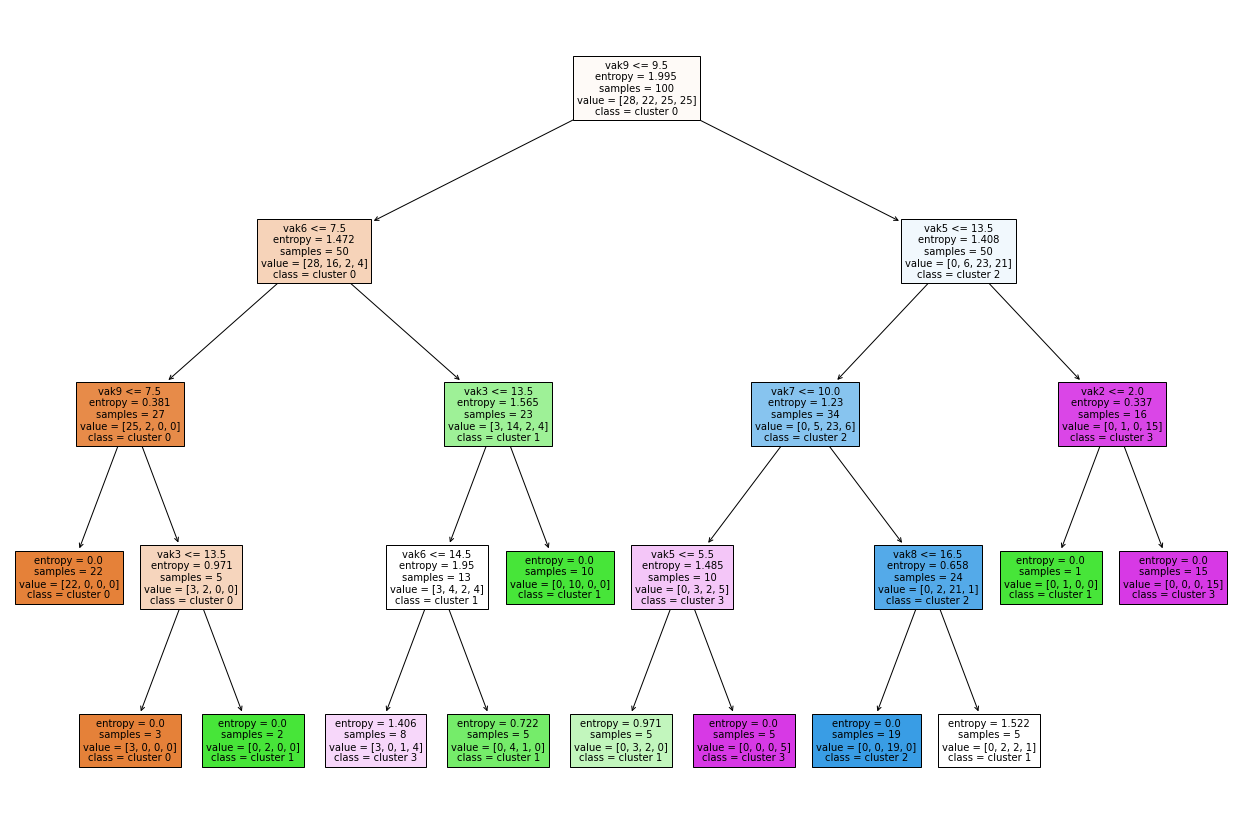

In [ ]:
studenten['categorie'] = model.labels_
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier.fit(studentpunten, studenten['categorie'])

# plot tree
plt.figure(figsize=(22, 15))  # set plot size (denoted in inches)
tree.plot_tree(classifier, feature_names=studentpunten.columns, class_names=['cluster {}'.format(i) for i in np.unique(model.labels_)], filled=True, fontsize=10)
plt.show()

7. Bereken voor iedere categorie ook de gemiddelden over de 9 vakken. Hoe zou je deze 4 categorieën typeren?


In [ ]:
for i in range(0, 4):
    print(f"Gemiddelde van cluster {i} : {studentpunten[studenten['categorie'] == i].to_numpy().flatten().mean()} en std: {studentpunten[studenten['categorie'] == i].to_numpy().flatten().std()}")
# op basis van de std en gemiddelde kunnen we hier niet spreken van grote verschillen qua resultaten daarvoor liggen de gegevens binnen de clusters nog te ver van mekaar
# maar als we een indeling zouden moeten maken zou cluster 0 slecht scoren op V9 enV6 cluster 1 meestal slecht op vak9 cluster 2 goed op v9 en cluster 3 lijkt het beste in de meeste gevallen

Gemiddelde van cluster 0 : 8.317460317460318 en std: 5.780578860521756
Gemiddelde van cluster 1 : 11.035353535353535 en std: 5.600663978156954
Gemiddelde van cluster 2 : 9.928888888888888 en std: 5.927286140187119
Gemiddelde van cluster 3 : 10.751111111111111 en std: 5.769676371521956


8. In welke categorie valt een nieuwe student met de volgende punten: (10, 15, 12, 11, 13, 14, 9, 10,11)?



In [ ]:
classifier.predict(pd.DataFrame([[10, 15, 12, 11, 13, 14, 9, 10, 11]]))

array([3], dtype=int32)